In [489]:
!ls zippedData/

bom.movie_gross.csv     im.db 2                 rt.reviews.tsv.gz
bom.movie_gross.csv.gz  im.db.zip               tmdb.movies.csv.gz
im.db                   rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz


In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [491]:
# Question #2: What is the most popular genre? (genre vs poularity)

In [492]:
# Genre and Popularity measurements were found in the TMDB Database
TMDB_data = pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [493]:
TMDB_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [494]:
# In order to utilize the genre information, it needed split apart and exploded.
TMDB_data["genre_ids"] = TMDB_data["genre_ids"].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")

In [495]:
TMDB_genre = TMDB_data.explode(column="genre_ids")

In [496]:
# Then we found the avg popularity for each genre over the 8 years contained in this data, and returning 
# a list of the top 10 most popular genres over that span. 
genres = TMDB_genre.groupby('genre_ids')['popularity'].mean().sort_values(ascending=False).head(10)

In [497]:
#  Using the code on the TMDB website, we converted the top 10 genres from numeric code to name associated with
# the number. 
lst_of_genres = ['Adventure', 'Action', 'Fantasy', 'Crime', 'War', 'Science Fiction', 'Thriller', 'Mystery', 'Family', 'Animation'] 

In [498]:
genres.index = lst_of_genres
genres.index

Index(['Adventure', 'Action', 'Fantasy', 'Crime', 'War', 'Science Fiction',
       'Thriller', 'Mystery', 'Family', 'Animation'],
      dtype='object')

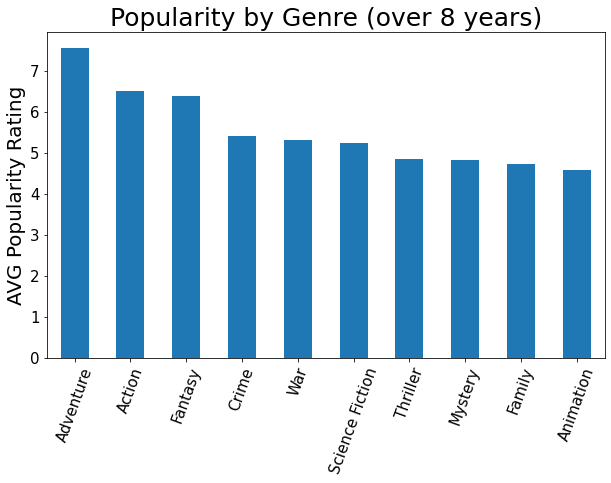

In [500]:
# Lastly, we made a histogram to visualize the top ten most popular genres in relation to each other. 

x = genres.index
y = genres.values
plt.figure(figsize=(10,6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Popularity by Genre (over 8 years)", fontsize=25)
plt.ylabel("AVG Popularity Rating", fontsize=20)
ax= genres.plot.bar(x=x, y=y, rot=70)

fig.patch.set_facecolor('white')
fig.patch.set_alpha(1)

plt.savefig('popularity_by_genre.png', facecolor=fig.get_facecolor(), edgecolor='none', bbox_inches="tight")
